# Projeto Final  
## Avaliação de inscritos neurodivergentes no Enem - 2019
## Curso de Big Data Science 

**Autor** : Maria Fisher



# Introdução 

Dados do IBGE mostraram que em 2019, apenas 16,6% da população brasileira com deficiência possuía ensino médio completo. Segundo, dados do IBGE (2010), teve um aumento significativo na inclusão de estudantes especiais com 640% das matrículas em escolas comuns e de 28% em escolas e classes especiais no período de 1998-2006. 

Em 2018, o número de estudantes matriculados portadores de deficiência teve um aumento de 0,04% em 2017 para 0,06% em 2018 do total de matriculados. Em 2019, o  número de matrículas da educação especial chegou a 1,3 milhão, com aumento de 34,4% em relação a 2015 (Inep, 2020). Porém, penas 0,52% do total de matriculados em cursos de graduação do Ensino Superior são declarados com deficiência (Quero Bolsa, 2020). 

Esses dados mostram que apenas uma parcela pequena de pessoas com deficiência conseguem suporte adequado para continuar sua educação e portanto com menor oportunidade de tornar-se cidadão independente e mais produtivo na comunidade. 

Esse trabalho tem como objetivo avaliar a performance dos inscritos no Enem que se declaram neurodivergentes quanto ao desempenho nas notas e algumas variáveis sociais que os circundam. Considerou-se neurodivergentes aqueles que se declararam portador de: Autismo, Deficit de Atenção, Deficiência Mental, Dislexia, Discalculia. 

# Métodos

### Pre-processamento dos dados 

In [29]:
import numpy as np
import pandas as pd
import statistics  as sts
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import pearsonr
import zipfile
import matplotlib.ticker as mtick
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
colunas = ['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE', 'TP_SEXO','TP_COR_RACA',
           'IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA','IN_DISCALCULIA','IN_AUTISMO',
           'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_MT', 'Q001', 'Q002', 'Q024', 'Q025']


In [ ]:
with zipfile.ZipFile('../ProjetoFinal/archive.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
     %time enem_2019 = pd.read_csv(f, sep= ';', encoding='ISO-8859-1',usecols=colunas)
           

In [ ]:
enem_2019.head()

In [ ]:
# Verificar total numero de candidatos neurodivergentes
neurodivergentes = enem_2019[['IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA',
                                      'IN_DISCALCULIA','IN_AUTISMO']]



In [ ]:
# Total numero de candidatos neurodivergentes
neurodivergentes.sum()

Numero de neurodivergentes participantes do Enem em 2019

Deficiencia Mental  = 2248

Deficit de atenção  = 8338

Dislexia            = 1596

Discalculia         = 382

Autismo             = 1204

Para separar o dataset em Neurodivergentes e Normativos foi criado a função Neurodivergente onde para cada row (linha) que contém valor verdade (True = 1) retorna a condição Neurodivergente e caso seja falso (False = 0) retorna Normativo. O parametro da função é um Series object labelled "row". 

Depois, aplicou-se a função .apply() no dataset e na sequencia a coluna nova foi salva no dataset original. 



In [ ]:
#
def Neurodivergente (row):
   if row['IN_DEFICIENCIA_MENTAL'] == 1 :
      return 'Deficiente mental'
   if row['IN_DEFICIT_ATENCAO'] == 1 :
      return 'Deficit atenção'
   if row['IN_DISLEXIA'] == 1 :
      return 'Dislexia'
   if row['IN_DISCALCULIA'] == 1:
      return 'Discalculia'
   if row['IN_AUTISMO']  == 1:
      return 'Autismo'
   return 'Normativo'


In [ ]:
enem_2019.apply (lambda row: Neurodivergente(row), axis=1)

In [ ]:
enem_2019['Neurodivergente'] = enem_2019.apply (lambda row: Neurodivergente(row), axis=1)

In [ ]:
enem_2019.tail(10)

In [ ]:
# Mudar valores [nome da colunas, nomear classes, e valores booleanos]

enem_2019['Código_Geográfico'] = enem_2019['CO_MUNICIPIO_RESIDENCIA']
enem_2019['Município'] = enem_2019['NO_MUNICIPIO_RESIDENCIA']
enem_2019['UF'] = enem_2019['SG_UF_RESIDENCIA']
enem_2019['Cor_Raça'] = enem_2019['TP_COR_RACA'].replace([0, 1, 2, 3, 4, 5],['Não declarado','Branca','Preta', 'Parda', 'Amarela', 'Indígena'])
enem_2019['Gênero'] = enem_2019['TP_SEXO']
enem_2019['Idade'] = enem_2019['NU_IDADE']
enem_2019['Escolaridade_Pai'] = enem_2019['Q001']
enem_2019['Escolaridade_Mãe'] = enem_2019['Q002']
enem_2019['Computador?'] = enem_2019['Q024'].replace(['A','B','C', 'D', 'E'],['Não','Sim(1)','Sim(2)', 'Sim(3)', 'Sim(4+)'])
enem_2019['Acesso_Internet'] = enem_2019['Q025'].replace(['A','B'],['Não','Sim'])
enem_2019['Redação'] = enem_2019['NU_NOTA_REDACAO']
enem_2019['Ciências_Humanas'] = enem_2019['NU_NOTA_CH']
enem_2019['Ciências_Naturais'] = enem_2019['NU_NOTA_CN']
enem_2019['Matemática'] = enem_2019['NU_NOTA_MT']
enem_2019['Linguagens_Códigos'] = enem_2019['NU_NOTA_LC']





In [ ]:
enem_2019 = enem_2019.drop(columns=[ 'CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
                                    'NU_IDADE','TP_SEXO','TP_COR_RACA','IN_DEFICIENCIA_MENTAL',
                                    'IN_DEFICIT_ATENCAO','IN_DISLEXIA','IN_DISCALCULIA','IN_AUTISMO',
                                    'Q001','Q002','Q024','Q025','NU_NOTA_REDACAO',
                                    'NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_LC'])

In [ ]:
enem_2019.head()

In [ ]:
#Resumo do dataframe

def show_info(enem_2019):
    print('DATASET SHAPE: ', enem_2019.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(enem_2019.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(enem_2019.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(enem_2019.isnull().sum())
  
show_info(enem_2019)

In [ ]:
enem_2019 = enem_2019.dropna()
enem_2019 = enem_2019.reset_index(drop=True)

In [ ]:
msno.bar(enem_2019)

In [ ]:
enem_2019.to_csv (r'../ProjetoFinal/enem2019.csv', index = False, header=True)

In [ ]:
enem_2019.tail(10)

### Separar Normativos e Neurodivergentes em dois datasets

In [ ]:
normativo_enem2019 = enem_2019[enem_2019.Neurodivergente == 'Normativo']


In [ ]:
normativo_enem2019.head()

In [ ]:
normativo_enem2019.to_csv (r'../ProjetoFinal/normativo_enem2019.csv', index = False, header=True)


In [ ]:
neurodivergente_enem2019 = enem_2019[enem_2019.Neurodivergente != 'Normativo']

In [ ]:
neurodivergente_enem2019.head(10)

In [ ]:
neurodivergente_enem2019.to_csv (r'../ProjetoFinal/neurodivergente_enem2019.csv', index = False, header=True)


# Análise Descritiva 

In [15]:
enem_2019 = pd.read_csv (r'../ProjetoFinal/enem2019.csv')
enem_2019.head()


,Neurodivergente,Código_Geográfico,Município,UF,Cor_Raça,Gênero,Idade,Escolaridade_Pai,Escolaridade_Mãe,Computador?,Acesso_Internet,Redação,Ciências_Humanas,Ciências_Naturais,Matemática,Linguagens_Códigos
0,Normativo,1506807,Santarém,PA,Parda,M,21,D,E,Sim(1),Não,780.0,466.0,472.9,369.1,497.3
1,Normativo,1504059,Mãe do Rio,PA,Parda,F,16,D,E,Não,Não,600.0,495.4,358.9,416.5,482.3
2,Normativo,1505502,Paragominas,PA,Branca,F,18,H,E,Sim(2),Sim,640.0,538.7,574.2,571.5,582.6
3,Normativo,1500800,Ananindeua,PA,Branca,M,31,C,C,Não,Não,580.0,592.6,522.0,605.3,582.0
4,Normativo,1504208,Marabá,PA,Parda,F,30,B,B,Não,Sim,360.0,480.1,407.4,581.5,464.3


In [3]:
enem_2019.value_counts()

Neurodivergente  Código_Geográfico  Município      UF  Cor_Raça  Gênero  Idade  Escolaridade_Pai  Escolaridade_Mãe  Computador?  Acesso_Internet  Redação  Ciências_Humanas  Ciências_Naturais  Matemática  Linguagens_Códigos
Autismo          1100106            Guajará-Mirim  RO  Parda     F       21     H                 E                 Não          Não              0.0      380.1             335.7              361.8       475.7                 1
Normativo        3505708            Barueri        SP  Branca    M       27     E                 E                 Sim(1)       Sim              500.0    509.5             435.1              496.3       533.3                 1
                                                                         35     D                 D                 Sim(2)       Sim              660.0    602.2             542.0              503.5       594.1                 1
                                                                                E            

### Porcentagens para cada neurotipo
As porcentagens de inscritos no Enem declarados neurodivergentes são pequenas, sendo assim dividimos o dataset em normativos e neurodivergentes para as analises descritivas.

In [123]:
frequencia = enem_2019['Neurodivergente'].value_counts()
percentual = enem_2019['Neurodivergente'].value_counts(normalize = True)*100
percentual

Normativo            99.731416
Deficit atenção       0.182928
Deficiente mental     0.044192
Autismo               0.020691
Dislexia              0.018990
Discalculia           0.001783
Name: Neurodivergente, dtype: float64

In [118]:
freq_neurodivergente = pd.DataFrame({'Frequência': frequencia,'Porcentagem(%)': percentual})
freq_neurodivergente

,Frequência,Porcentagem(%)
Normativo,3692064,99.731416
Deficit atenção,6772,0.182928
Deficiente mental,1636,0.044192
Autismo,766,0.020691
Dislexia,703,0.018990
Discalculia,66,0.001783


In [119]:
freq_neurodivergente.rename_axis('Neurodivergente', axis = 'columns', inplace = True)
freq_neurodivergente

Neurodivergente,Frequência,Porcentagem(%)
Normativo,3692064,99.731416
Deficit atenção,6772,0.182928
Deficiente mental,1636,0.044192
Autismo,766,0.020691
Dislexia,703,0.018990
Discalculia,66,0.001783


In [148]:
freq_neurodivergente = {'Porcentagem(%)': [0.182928,0.044192,0.020691,0.018990,0.001783]}
df = pd.DataFrame(freq_neurodivergente,columns=['Porcentagem(%)'],index = [['Deficit atenção', 'Deficiente mental', 'Autismo', 'Dislexia','Discalculia']])

print (df)

                   Porcentagem(%)
Deficit atenção          0.182928
Deficiente mental        0.044192
Autismo                  0.020691
Dislexia                 0.018990
Discalculia              0.001783


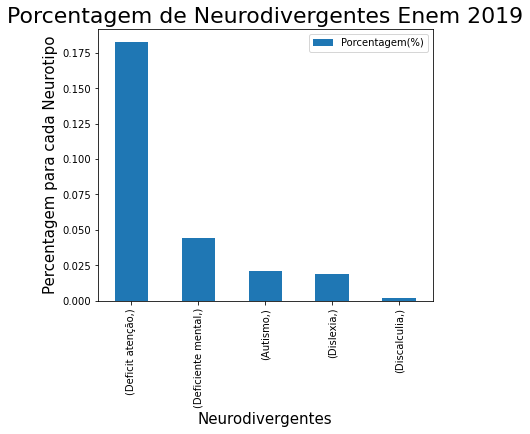

In [181]:

ax = df.plot.bar(y='Porcentagem(%)',figsize=(6,5))
plt.title('Porcentagem de Neurodivergentes Enem 2019', fontsize=22)
plt.xlabel("Neurodivergentes", fontsize=15, )
plt.ylabel("Percentagem para cada Neurotipo",  fontsize=15)
          
plt.show()

## Inscritos no Enem 2019 Neuronormativos

In [ ]:
normativo_enem2019 = pd.read_csv (r'../ProjetoFinal/normativo_enem2019.csv')
normativo_enem2019.head()

In [ ]:
# Cálculos da média e desvio padrão para os normativos
Idade = sts.stdev(normativo_enem2019['Idade'])/sts.mean(normativo_enem2019['Idade'])
Ciências_Naturais = sts.stdev(normativo_enem2019['Ciências_Naturais'])/sts.mean(normativo_enem2019['Ciências_Naturais'])
Ciências_Humanas = sts.stdev(normativo_enem2019['Ciências_Humanas'])/sts.mean(normativo_enem2019['Ciências_Humanas'])
Linguagens_Códigos = sts.stdev(normativo_enem2019['Linguagens_Códigos'])/sts.mean(normativo_enem2019['Linguagens_Códigos'])
Matemática = sts.stdev(normativo_enem2019['Matemática'])/sts.mean(normativo_enem2019['Matemática'])
Redação = sts.stdev(normativo_enem2019['Redação'])/sts.mean(normativo_enem2019['Redação'])

print('Idade: \n',round(Idade,2))
print('Ciências_Naturais: \n',round(Ciências_Naturais,2))
print('Ciências_Humanas : \n',round(Ciências_Humanas,2))
print('Linguagens_Códigos: \n',round(Linguagens_Códigos,2))
print('Matemática : \n',round(Matemática,2))
print('Redação: \n',round(Redação,2))

In [ ]:
# Selecionar colunas com dados numericos
normativo_numerical = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']


In [ ]:
# Descrição estatística das variaveis numericas
normativo_enem2019[normativo_numerical].describe().round(2).T

In [ ]:
va_quantitativa = ['float64', 'int64']
quantitativas = list(normativo_enem2019.select_dtypes(include=va_quantitativa).columns)
quantitativas

In [ ]:
# Selecionar colunas numericas para elaboração de gráficos 
normativo_quantitativas = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']


In [ ]:
normativo_enem2019_quanti = normativo_enem2019[normativo_quantitativas]
normativo_enem2019_quanti.head()

In [ ]:
normativo_enem2019_quanti[['Idade','Ciências_Naturais','Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']].hist(
    bins=10,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
)
plt.show()

A análise das variaveis númericas mostram que a média das notas dos inscritos normativos não tiveram alta performance. Em todas as disciplinas a média ficou em torno de 500.     

In [ ]:
va_nominal = ['object', 'bool']
qualitativas = list(normativo_enem2019.select_dtypes(include=va_nominal).columns)
qualitativas

In [ ]:
# Selecionar colunas com dados categoricos
normativo_nominal = ['UF','Cor_Raça', 'Gênero','Escolaridade_Pai','Escolaridade_Mãe','Computador?', 'Acesso_Internet', 'Neurodivergente',]


In [ ]:
normativo_enem2019_quali = normativo_enem2019[normativo_nominal]
normativo_enem2019_quali.head()


In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(normativo_enem2019_quali):
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(data=normativo_enem2019_quali, palette='husl', x=col, ax=ax) 
plt.suptitle('Variáveis categoricas Enem 2019 Neuronormativos')
plt.tight_layout()

Os estados de São Paulo, Minas Gerais e Bahia, foram os que receberam mais inscritos para o Enem em 2019. Destes a 59% são do gênero feminino.

Quanto ao perfil social se declararam 45% pardos, 37% brancos, 12% pretos, seguidos de amarelos e indigenas. 

Nivel de escolaridade do pai, 27% completaram Ensino Médio, 20% possuem 4ª série/5º ano incompleto, 13.9% completaram a 4ª série/5º ano e 5% nunca estudaram. 

Equanto que o nivel de escolaridade das mães, 33% completaram o Ensino Médio, 14.9% não completaram a 4ª série/5º ano, 12.9% completaram o Ensino Fundamental, e 3% não estudou. 




## Inscritos no Enem 2019 Neurodivergentes

In [ ]:
neurodivergente_enem2019 = pd.read_csv (r'../ProjetoFinal/neurodivergente_enem2019.csv')
neurodivergente_enem2019.head()

In [ ]:
Idade = sts.stdev(neurodivergente_enem2019['Idade'])/sts.mean(neurodivergente_enem2019['Idade'])
Ciências_Naturais = sts.stdev(neurodivergente_enem2019['Ciências_Naturais'])/sts.mean(neurodivergente_enem2019['Ciências_Naturais'])
Ciências_Humanas = sts.stdev(neurodivergente_enem2019['Ciências_Humanas'])/sts.mean(neurodivergente_enem2019['Ciências_Humanas'])
Linguagens_Códigos = sts.stdev(neurodivergente_enem2019['Linguagens_Códigos'])/sts.mean(neurodivergente_enem2019['Linguagens_Códigos'])
Matemática = sts.stdev(neurodivergente_enem2019['Matemática'])/sts.mean(neurodivergente_enem2019['Matemática'])
Redação = sts.stdev(neurodivergente_enem2019['Redação'])/sts.mean(neurodivergente_enem2019['Redação'])

print('Idade: \n',round(Idade,2))
print('Ciências_Naturais: \n',round(Ciências_Naturais,2))
print('Ciências_Humanas : \n',round(Ciências_Humanas,2))
print('Linguagens_Códigos: \n',round(Linguagens_Códigos,2))
print('Matemática : \n',round(Matemática,2))
print('Redação: \n',round(Redação,2))

In [ ]:
va_nominal = ['object', 'bool']
qualitativas = list(neurodivergente_enem2019.select_dtypes(include=va_nominal).columns)
qualitativas

In [ ]:
# Selecionar colunas com dados categoricos
neurodivergente_qualitativas = ['UF','Neurodivergente', 'Cor_Raça', 'Gênero','Escolaridade_Pai','Escolaridade_Mãe','Computador?', 'Acesso_Internet']


In [ ]:
neurodivergente_enem2019_quali = neurodivergente_enem2019[neurodivergente_qualitativas]
neurodivergente_enem2019_quali.head()

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(neurodivergente_enem2019_quali):
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(data=neurodivergente_enem2019_quali, palette='husl', x=col, ax=ax) 
plt.suptitle('Variáveis categoricas Enem 2019 Neurodivergentes')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()

Nesse estudo verificou-se que no Enem de 2019, 68% inscritos são portadores de Deficit de Atenção, 16.5% Deficiência Mental, 7.7% Autismo, 7% Dislexia e apenas 0.7% apresenta Discalculia. 

Os estados com maior número de inscritos no Enem em 2010 e declaradas neurodivergentes são Minas Gerais, São Paulo e Rio de Janeiro. Destes a 50% são do gênero masculino e 49% feminino.

Quanto ao perfil social se declararam 54.7% brancos, 33.6% pardos, 6.6% pretos, seguidos 1.7% de amarelos e 0.3% de indigenas. 

Nivel de escolaridade do pai: 28.6% completaram Ensino Médio, 19.7% possuem Graudação, 17.5% tem Pós-graduação e 2.1% nunca estudaram. 

Equanto que o nivel de escolaridade das mães, 28% completaram o Ensino Médio, 27.9% tem Pós-graduação, 22.7% completou Graduação, apenas 1.5% não estudaram. 




In [ ]:
neurodivergente_numerical = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']

In [ ]:
neurodivergente_enem2019[neurodivergente_numerical].describe().round(2).T

In [ ]:
neurodivergente_enem2019_quali = neurodivergente_enem2019[neurodivergente_qualitativas]
neurodivergente_enem2019_quali.head()

In [ ]:
va_quantitativa = ['float64', 'int64']
quantitativas = list(neurodivergente_enem2019.select_dtypes(include=va_quantitativa).columns)
quantitativas

In [ ]:
neurodivergente_quantitativas = ['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']


In [ ]:
neurodivergente_enem2019_quanti = neurodivergente_enem2019[neurodivergente_quantitativas]

In [ ]:
neurodivergente_enem2019_quanti[['Idade','Ciências_Naturais','Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']].hist(
    bins=10,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
)
plt.show()


Com relação as notas, os neurodivergentes não diferem dos normativos, sendo que as notas se concentram ao redor da média de 500. Porém, entre os neurodivergentes a média da nota de Redação foi relativamente maior para os que se declaram portadores de Defict de Atenção.  

## Correlação 


In [ ]:
va_correlacao_diverg = neurodivergente_enem2019 [['Neurodivergente','Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']]
va_correlacao_diverg.corr()

In [ ]:
plt.figure(figsize=(10,7))
sns.pairplot(data=va_correlacao_diverg, hue="Neurodivergente")

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre as notas para Neurodivergentes', size=15)
sns.heatmap(va_correlacao_diverg.corr(), cmap='crest', center=0, annot=True)

In [ ]:
va_correlacao_normativo = normativo_enem2019[['Idade', 'Ciências_Naturais', 'Ciências_Humanas','Linguagens_Códigos','Matemática','Redação']]
va_correlacao_normativo.corr()

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre as notas para Neuronormativos', size=15)
sns.heatmap(va_correlacao_normativo.corr(), cmap='rocket', center=0, annot=True)

Na análise de correlação das notas dos inscritos neurodivergentes, percebe-se uma correlação mais forte entre Ciencias Naturais e Matemática, Linguagens e Código, e Ciências Humanas. 

Para neuronormativos a correlação mais forte é entre Linguagens e Códigos e Ciências Humanas. 

# Referências 

portal.mec.gov.br/seesp/arquivos/pdf/brasil.pdf

https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/notas_estatisticas_censo_da_educacao_basica_2019.pdf

https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/notas_estatisticas_censo_da_educacao_basica_2019.pdf

https://querobolsa.com.br/revista/numero-de-estudantes-com-deficiencia-cresce-no-ensino-superior-mas-permanencia-esbarra-na-falta-de-acessibilidade